In [185]:
"""
Author: Sikder Tahsin Al Amin
Description: Create an algorithm to distinguish dogs from cats
Info: Class label: Cats: 0, Dogs: 1
"""

'\nAuthor: Sikder Tahsin Al Amin\nDescription: Create an algorithm to distinguish dogs from cats\nInfo: Class label: Cats: 0, Dogs: 1\n'

In [199]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

import os
import cv2

## Discover the data/images 

1


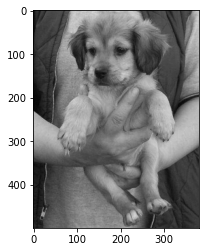

(500, 380)


In [200]:
path = "/dogs_cats/train"
CATEGORIES = ["Cat","Dog"]

# check one image
for img in os.listdir(path):
    if "cat" in img:
        class_num = 0
    else:
        class_num = 1
    print(class_num)
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break

print(img_array.shape)

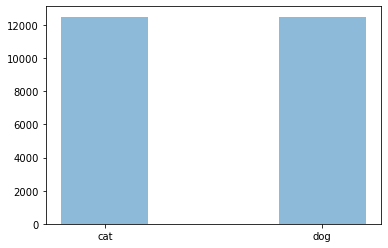

In [201]:
# check number of instances for each class with a bar plot
cat_count = 0
dog_count = 0
for img in os.listdir(path):
    if "cat" in img:
        cat_count +=1
    else:
        dog_count +=1

class_labels = ['cat', 'dog']
class_counts = [cat_count, dog_count]

plt.bar(class_labels,class_counts,alpha=0.5,width=0.4)
plt.show()

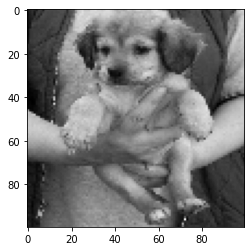

In [202]:
# resize the image to see if its recognizable
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

## Prepare the training data set

In [203]:
# load the images from disk and store them in a uniform way

training_data = [] 

def create_training_data():
    for img in os.listdir(path):
        if "cat" in img:
            class_num = 0
        else:
            class_num = 1
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass
            
create_training_data()

In [204]:
print(len(training_data)) #number of training instances

25000


In [205]:
#shuffle the training data
import random
random.shuffle(training_data)

In [206]:
# prepare the training data set to feed the model
x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

In [207]:
# normalize the training data and convert them to numpy array
x_train = np.asarray(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_train = x_train/255.0 #normalize
y_train = np.asarray(y_train)

## Create and train the model. 

In [208]:
## create a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#1st layer
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [210]:
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
activation_22 (Activation)   (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_23 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 33856)            

In [211]:
#train the model 
model.fit(x_train,y_train, validation_split=0.2, epochs = 10)

Epoch 1/10
625/625 [==============================] - 147s 234ms/step - loss: 0.6211 - accuracy: 0.6562 - val_loss: 0.5479 - val_accuracy: 0.7154
Epoch 2/10
625/625 [==============================] - 146s 234ms/step - loss: 0.4945 - accuracy: 0.7623 - val_loss: 0.4918 - val_accuracy: 0.7582
Epoch 3/10
625/625 [==============================] - 146s 234ms/step - loss: 0.4223 - accuracy: 0.8042 - val_loss: 0.5055 - val_accuracy: 0.7598
Epoch 4/10
625/625 [==============================] - 157s 251ms/step - loss: 0.3488 - accuracy: 0.8467 - val_loss: 0.4823 - val_accuracy: 0.7738
Epoch 5/10
625/625 [==============================] - 2466s 4s/step - loss: 0.2555 - accuracy: 0.8912 - val_loss: 0.5171 - val_accuracy: 0.7786
Epoch 6/10
625/625 [==============================] - 140s 225ms/step - loss: 0.1582 - accuracy: 0.9388 - val_loss: 0.6203 - val_accuracy: 0.7732
Epoch 7/10
625/625 [==============================] - 142s 227ms/step - loss: 0.0862 - accuracy: 0.9700 - val_loss: 0.7274 - v

## Preparing and predicting test data set: First approach (slower)

In [214]:
## preparing the dataset
test_path = "/dogs_cats/test1/"
img_id =[] 
prediction = []
i = 0
def prepare(test_path):
    IMG_SIZE = 100
    img_array = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [215]:
## prediction
for img in os.listdir(test_path):
    i=i+1
    img_id.append(i)
    test_img = os.path.join(test_path,img)
    pred = model.predict([prepare(test_img)]) #prediction
    prediction.append(int(pred[0][0]))

## Preparing and predicting test data set: Different approach (faster)

In [218]:
# testing with a different approach
test_data = []
test_path = "/dogs_cats/test1/"
IMG_SIZE = 100
img_id =[]
i = 0

for img in os.listdir(test_path):
    if ".jpg" in img:
        i=i+1
        img_id.append(i)
        test_img = os.path.join(test_path,img)
        img_array = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_data.append([new_array])
        
test_data = np.asarray(test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   


In [219]:
# prediction
pred = model.predict(test_data)

# Convert output to int and store in a list
prediction = []
for i in pred:
    prediction.append(int(i))

## Store the prediction in a CSV file

In [220]:
import pandas as pd
d = {'id':img_id,'label':prediction}
df = pd.DataFrame(d)

print(df.head(5))
df.to_csv('/Users/tahsin/Documents/kaggle/dogs_cats/dogs_cats_pred.csv', index=False) 

   id  label
0   1      0
1   2      1
2   3      1
3   4      1
4   5      0
